In [23]:
#@title -

# preparação do ambiente

!pip install pySUS

from google.colab import drive
drive.mount('/content/drive')

import copy
import pandas as pd
from pysus.utilities.readdbc import read_dbc
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import math

import sympy as sym

pd.set_option('display.max_colwidth', -1)

root_folder = 'drive/My Drive'
project_folder = '/Colab Notebooks/analise_exploratoria'
database_root = '/res/database/data'
metadata_folder = '/res/database/metadata'
database_csv = '/csv'
database_dbc = '/dbc'

campos_sinasc = pd.read_excel(f'{root_folder}{project_folder}{metadata_folder}/campos_sinasc.xlsx')
sinasc_ac2017 = read_dbc(f'{root_folder}{project_folder}{database_root}{database_dbc}/AC/DNAC2017.dbc', encoding='iso-8859-1')
sinasc_ac2017['IDADEMAE'] = pd.to_numeric(sinasc_ac2017['IDADEMAE'])

# viúvas com dados de filhos vivos
viuvas_filhosvivos = sinasc_ac2017[(sinasc_ac2017['ESTCIVMAE'] == '3') & (sinasc_ac2017['QTDFILVIVO']!= '')][['QTDFILVIVO']]
viuvas_filhosmortos = sinasc_ac2017[(sinasc_ac2017['ESTCIVMAE'] == '3') & (sinasc_ac2017['QTDFILMORT']!= '')][['QTDFILMORT']]

consultas1_apgar = sinasc_ac2017[(sinasc_ac2017['CONSULTAS'] == '1') & (sinasc_ac2017['APGAR1']!= '')][['APGAR1']]
consultas1_apgar['APGAR1'] = pd.to_numeric(consultas1_apgar['APGAR1'])

consultas4_apgar = sinasc_ac2017[(sinasc_ac2017['CONSULTAS'] == '4') & (sinasc_ac2017['APGAR1']!= '')][['APGAR1']]
consultas4_apgar['APGAR1'] = pd.to_numeric(consultas4_apgar['APGAR1'])


viuvas_filhosvivos['QTDFILVIVO'] = pd.to_numeric(viuvas_filhosvivos['QTDFILVIVO'])
viuvas_filhosmortos['QTDFILMORT'] = pd.to_numeric(viuvas_filhosmortos['QTDFILMORT'])
viuvas_filhosvivos_sort = viuvas_filhosvivos.sort_values(by=['QTDFILVIVO'])
n = viuvas_filhosvivos.shape[0]
soma = ""
for v in viuvas_filhosvivos['QTDFILVIVO'].to_numpy():
  soma += str(v) + '+'
  
media_fv = round(viuvas_filhosvivos.mean(axis = 0).values[0],2)
moda_fv = viuvas_filhosvivos.mode(axis = 0).values[0][0]
mediana_fv = viuvas_filhosvivos.median(axis = 0).values[0]
quartis_fv = viuvas_filhosvivos.quantile([0.25,0.5,0.75], axis=0).values
q1_fv = quartis_fv[0][0]
q2_fv = quartis_fv[1][0]
q3_fv = quartis_fv[2][0]

media_fm = round(viuvas_filhosmortos.mean(axis = 0).values[0],2)


percentis_fv = viuvas_filhosvivos.quantile([0.05,0.10,0.20,0.25,0.3,0.5,0.7, 0.75, 0.8,0.9,0.95], axis=0).values
p_5 = round(percentis_fv[0][0],2)
p_10 = round(percentis_fv[1][0],2)
p_20 = round(percentis_fv[2][0],2)
p_25 = round(percentis_fv[3][0],2)
p_30 = round(percentis_fv[4][0],2)
p_50 = round(percentis_fv[5][0],2)
p_70 = round(percentis_fv[6][0],2)
p_75 = round(percentis_fv[7][0],2)
p_80 = round(percentis_fv[8][0],2)
p_90 = round(percentis_fv[9][0],2)
p_95 = round(percentis_fv[10][0],2)

# viúvas com dados de filhos mortos
viuvas_filhosmortos = sinasc_ac2017[(sinasc_ac2017['ESTCIVMAE'] == '3') & (sinasc_ac2017['QTDFILMORT']!= '')][['QTDFILMORT']]

viuvas_filhosmortos['QTDFILMORT'] = pd.to_numeric(viuvas_filhosmortos['QTDFILMORT'])

# idade das viúvas
viuvas_idade = sinasc_ac2017[(sinasc_ac2017['ESTCIVMAE'] == '3') & (sinasc_ac2017['IDADEMAE'].notnull())][['IDADEMAE']]
viuvas_idade_sort = viuvas_idade.sort_values(by=['IDADEMAE'])
mediana_id = viuvas_idade.median(axis = 0).values[0]
quartis_id = viuvas_idade.quantile([0.25,0.5,0.75], axis=0).values
q1_id = quartis_id[0][0]
q2_id = quartis_id[1][0]
q3_id = quartis_id[2][0]

percentis_id = viuvas_idade.quantile([0.05,0.10,0.20,0.25,0.3,0.5,0.7, 0.75, 0.8,0.9,0.95], axis=0).values
p_id_5 = round(percentis_id[0][0],2)
p_id_10 = round(percentis_id[1][0],2)
p_id_20 = round(percentis_id[2][0],2)
p_id_25 = round(percentis_id[3][0],2)
p_id_30 = round(percentis_id[4][0],2)
p_id_50 = round(percentis_id[5][0],2)
p_id_70 = round(percentis_id[6][0],2)
p_id_75 = round(percentis_id[7][0],2)
p_id_80 = round(percentis_id[8][0],2)
p_id_90 = round(percentis_id[9][0],2)
p_id_95 = round(percentis_id[10][0],2)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Curso de Atualização em Health Data Science Analytics
## Novembro/2019

## Análise Exploratória de Dados


# Apresentação
## Prof. Me Fernando Sequeira Sousa



*   Bacharel em Informática Biomédica - FMRP/FFCLRP - USP
*   Mestre em Ciência - Área de Gestão e Informática em Saúde - DIS - UNIFESP
*   Lead Data Engineer - Optimum Soluções
*   Professor Faculdade Impacta de Tecnologia
   *   Graduação - ADS, SI, BD, GTI
   *   Pós-graduação - Big Data e Business Analytics
*   Principais Disciplinas: 
   *   Web Mining 
   *   Linguagem SQL e Linguagem NoSQL 
   *   Projeto de Big Data Analytics 
   *   Linguagem de Programação 
   *   Tecnologias Web 
   *   Desenvolvimento para Dispositivos Móveis 
   *   Oficina Projeto de Empresa 
   *   Trabalho de Conclusão de Curso
   
# Objetivos

O objetivo do curso é apresentar as principais técnicas estatísticas para descrição e
exploração de dados, utilizar os pacotes estatísticos com a linguagem python e promover habilidades de interpretação de resultados de análises descritivas e exploratórias.


# Conteúdo Programático
   
*   Tipos de variáveis;
*   Representação de variáveis qualitativas: 
   *   tabelas de frequências;
   *   gráficos de barras;
   *   gráficos de setores.
*   Medidas descritivas de dados quantitativos:
   *   posição;
   *   dispersão;
   *   assimetria;
   *   concentração.
* Representação de variáveis quantitativas:
   *   tabelas de frequências;
   *   histograma, gráfico de caixas;
   *   ramo-e-folhas;
   *   gráfico de pontos.
*   Tabelas de contingência e medidas de associação entre variáveis qualitativas;
*   Associação entre variáveis quantitativas e qualitativas;
*   Representação gráfica de dados multidimensionais;
*   Análise de agrupamentos. 
   

   





# Preparação do Ambiente
## Google colab
Acesse: https://colab.research.google.com e faça login com sua conta do Google
1.   Selecione a opção "GOOGLE DRIVE"
2.   Selecione a opção "NOVO PYTHON 3 NOTEBOOK"

![alt text](https://docs.google.com/uc?export=download&id=1WjrNw5VjwSxp7AzaNFcjHty_CR91Lyaq)


O notebook será aberto. No notebook faça o seguinte:
1.   Altere no nome do arquivo
2.   clique ao lado do "play", escreva o código abaixo e aperte o "play":


```
print('Olá mundo')
```

Veja o resultado logo abaixo.


![alt text](https://docs.google.com/uc?export=download&id=16uB-y_fcjs9dYr41YVh1vVn3ExBf_Xc5)


# Introdução

A análise exploratória de dados é uma forma de analisar um conjunto de dados para sumarizar suas características. Usualmente são utilizados métodos visuais para representar os dados, como tabelas e gráficos.



## Dados

In [0]:
#@title Dados de nascidos vivos no AC em 2017
sinasc_ac2017.head(20)

,NUMERODN,CODINST,ORIGEM,NUMERODV,PREFIXODN,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,71276212,MRO1100100010,1,6,30,2515768,110010,1,22.0,1,4,,02,02,120040,6,1,2,2,17052017,1344,2,09,10,4,4085,2,25052017,,20170006,3.2.01,05062017,019,,812,120070,12,3,3,26081994,4,04,03,01,42,25072016,42,8,01,04,1,2,2,1,2,3,17052017,06,0,1,,05,1,2
1,71243444,MRO1100180002,1,7,30,2516047,110018,1,30.0,2,5,,01,,120020,5,1,2,3,27042017,1750,2,09,10,4,3460,2,04052017,,20170005,3.2.01,05052017,008,,811,110018,11,5,,11031987,4,01,,01,28,16072016,40,8,05,03,1,2,2,1,5,4,27042017,08,0,1,,05,1,3
2,71268591,MRO1100200003,1,1,30,5618347,110020,1,26.0,2,4,999992,03,00,120001,5,1,1,3,03012017,1830,2,08,09,4,3690,2,16012017,,20170002,3.2.01,03022017,031,,813,130240,13,3,3,05051990,4,03,03,00,,05042016,38,8,06,05,1,2,3,1,2,4,03012017,06,0,1,,03,1,2
3,71268099,MRO1100200003,1,5,30,5618347,110020,1,28.0,2,4,999992,00,00,120001,5,1,2,4,13022017,2025,2,08,09,4,2925,2,13032017,,20170004,3.2.01,06042017,052,,835,353440,35,2,8,08041988,4,00,00,00,22,15052016,38,8,07,02,1,1,2,1,2,4,18022017,04,0,1,,02,0,5
4,71262056,MRO1100200003,1,9,30,5618347,110020,1,22.0,2,3,622020,01,00,120040,5,1,1,3,10032017,0315,1,08,09,4,3720,2,23032017,,20170004,3.2.01,06042017,027,,812,120040,12,2,7,03091994,4,01,01,00,28,02062016,40,8,06,04,1,2,3,1,2,3,11032017,03,0,1,,03,1,2
5,71262903,MRO1100200003,1,5,30,2515423,110020,1,34.0,2,4,513205,03,00,120040,,1,2,1,20032017,1435,2,08,09,1,3750,2,24032017,,20170004,3.2.01,06042017,017,,850,500400,50,3,,09041982,1,03,00,03,,,,,,,,,,1,2,3,20032017,12,0,1,,11,1,9
6,71256747,MRO1100200003,1,1,30,4001303,110020,1,35.0,2,4,,04,02,120032,5,1,2,4,04052017,1138,1,08,09,4,3800,2,11052017,,20170005,3.2.01,12052017,008,,812,120060,12,3,,02091981,4,06,03,03,,,41,1,08,,1,2,2,1,5,4,04052017,12,0,1,,05,1,9
7,71258501,MRO1100200003,1,1,30,5618347,110020,1,29.0,2,4,999992,01,00,120001,6,1,2,4,03052017,1445,2,09,10,1,3190,2,15052017,,20170006,3.2.01,13062017,041,,811,110012,11,3,,29071987,1,01,00,01,,06072016,42,8,14,01,1,2,1,1,2,3,03052017,12,0,1,,05,1,5
8,71262725,MRO1100200003,1,3,30,5618347,110020,1,17.0,5,3,,01,00,120001,5,1,1,3,05042017,2303,2,09,10,4,3105,2,15052017,,20170006,3.2.01,13062017,069,,812,120001,12,2,,16061999,4,01,01,00,24,,39,9,06,02,1,2,3,1,2,3,05042017,11,0,1,,03,1,4
9,71275106,MRO1100200003,1,0,30,5618347,110020,1,35.0,5,3,622020,00,00,120001,5,1,1,4,19052017,1540,1,09,10,,3100,2,07062017,,20170006,3.2.01,13062017,025,,812,120040,12,1,4,03091981,,00,00,00,29,06082016,40,8,08,02,1,2,3,1,2,3,19052017,02,0,1,,01,0,5


## Informação


In [0]:
#@title A média de idade das mães com nascidos vivos em 2017 no AC foi de 25,11 anos <br>  Em 2017 no AC, houve mais nascidos vivos do sexo masculino
sinasc_ac2017[['IDADEMAE','SEXO']].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDADEMAE,16346,NaN,NaN,NaN,25.1162,6.93293,11,19,24,30,54
SEXO,16358,3,1,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Representação


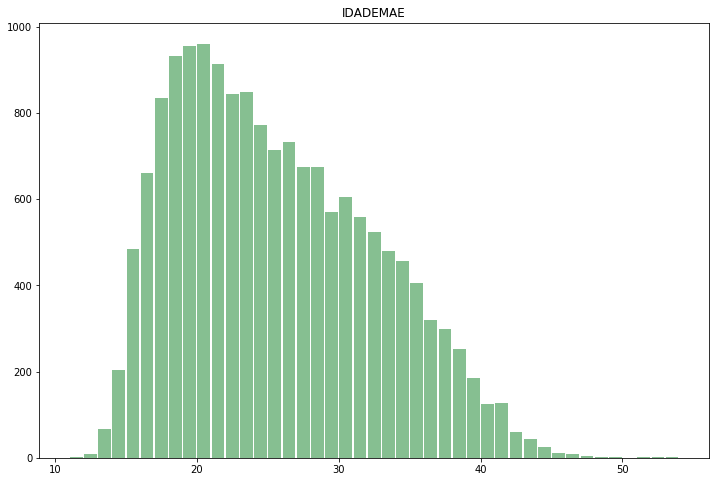

In [0]:
#@title Histograma de idade das mães de nascidos vivos em 2015 no Acre

hist = sinasc_ac2017.hist(column='IDADEMAE', bins=len(sinasc_ac2017.IDADEMAE.unique()), grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


# Tipos de Variáveis e Organização de Bases de Dados



In [0]:
#@title Tipos de variáveis
import plotly.graph_objects as go


colors = [['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)'],['rgba(0, 116, 52, 0.8)', 'rgba(0, 176, 80, 0.8)',
          'rgba(0, 234, 106, 0.8)']]

labels = [['Categorias sem ordenação. <br>Ex: sexo, estado civil, <br>fumante/não fumante',
           'Categorias com existência <br>de ordenação. <br>Ex: escolaridade, nível de colesterol, <br>faixa etária',
           'Valores mensuráveis e <br>contáveis (inteiros).<br> Resultado de contagens. <br>Ex: Número de filhos, <br>doses de álcool ingerida', 
           'Valores mensuráveis em <br>escala contínua (reais). <br>Usualmente medidos por instrumento. <br>Ex: idade, altura, pressão arterial'], 
          ['Nominais', 'Ordinais', 'Discretas', 'Contínuas'],
         ['Qualitativas', '', 'Quantitativas']]

x_data = [
          [25, 25, 25, 25],
          [25, 25, 25, 25],
          [50, 0, 50, 0]]

y_data = [' ', '  ', '   ']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for j, (xd, yd) in enumerate(zip(x_data, y_data)):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            hoverinfo ='none',
            marker=dict(
                color=colors[i//2][j],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.0, 1],
        visible=False
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        visible=False
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=10, r=10, t=10, b=10),
    showlegend=False,
)

annotations = []

for j, (yd, xd) in enumerate(zip(y_data, x_data)):
    
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(labels[j][0]),
                            font=dict(family='Arial', size=16,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))

    space = xd[0]
    for i in range(1, len(xd)):
      if xd[i] != 0:
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(labels[j][i]),
                                    font=dict(family='Arial', size=16,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))

            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show()

## Exercício - Tipos de Variáveis


In [0]:
#@title Classifique cada uma das varáveis da base de dados de Nascidos Vivos do Acre em 2017 nas categorias acima
campos_sinasc.loc[:'25',:'VALORES']

,CAMPO,DESCRICAO,VALORES
0,NUMERODN,Número da declaração de nascido vivo,"Sequencial, por UF informante e ano"
1,LOCNASC,Local de ocorrência do nascimento,1: Hospital; 2: Outro Estab Saúde; 3: Domicílio; 4: Outros
2,CODESTAB,Código de estabelecimento de saúde.,NaN
3,CODBAINASC,Código Bairro nascimento,NaN
4,CODMUNNASC,Código do município de ocorrência,NaN
5,IDADEMAE,Idade da mãe em anos.,NaN
6,ESTCIVMAE,Estado civil da mãe,1: Solteira; 2: Casada; 3: Viúva; 4: Separado judicialmente/Divorciado
7,ESCMAE,"Escolaridade, anos de estudo concluídos",1: Nenhuma; 2: 1 a 3 anos; 3: 4 a 7 anos; 4: 8 a 11 anos; 5: 12 e mais
8,CODOCUPMAE,Ocupação da mãe,Classificação Brasileira de Ocupações (CBO 202)
9,QTDFILVIVO,Número de filhos vivos,NaN


In [0]:
#@title Resposta - Tipos de Variáveis
campos_sinasc.loc[:'25',campos_sinasc.columns != 'IGNORADO']

,CAMPO,DESCRICAO,VALORES,TIPO1,TIPO2
0,NUMERODN,Número da declaração de nascido vivo,"Sequencial, por UF informante e ano",Qualitativa,Nominal
1,LOCNASC,Local de ocorrência do nascimento,1: Hospital; 2: Outro Estab Saúde; 3: Domicílio; 4: Outros,Qualitativa,Nominal
2,CODESTAB,Código de estabelecimento de saúde.,NaN,Qualitativa,Nominal
3,CODBAINASC,Código Bairro nascimento,NaN,Qualitativa,Nominal
4,CODMUNNASC,Código do município de ocorrência,NaN,Qualitativa,Nominal
5,IDADEMAE,Idade da mãe em anos.,NaN,Quantitativa,Contínuo
6,ESTCIVMAE,Estado civil da mãe,1: Solteira; 2: Casada; 3: Viúva; 4: Separado judicialmente/Divorciado,Qualitativa,Nominal
7,ESCMAE,"Escolaridade, anos de estudo concluídos",1: Nenhuma; 2: 1 a 3 anos; 3: 4 a 7 anos; 4: 8 a 11 anos; 5: 12 e mais,Qualitativa,Ordinal
8,CODOCUPMAE,Ocupação da mãe,Classificação Brasileira de Ocupações (CBO 202),Qualitativa,Nominal
9,QTDFILVIVO,Número de filhos vivos,NaN,Quantitativa,Discreto


In [0]:
#@title Organizado pelos tipos
campos_sinasc.loc[:'25',campos_sinasc.columns != 'IGNORADO'].sort_values(['TIPO1', 'TIPO2'])

,CAMPO,DESCRICAO,VALORES,TIPO1,TIPO2
0,NUMERODN,Número da declaração de nascido vivo,"Sequencial, por UF informante e ano",Qualitativa,Nominal
1,LOCNASC,Local de ocorrência do nascimento,1: Hospital; 2: Outro Estab Saúde; 3: Domicílio; 4: Outros,Qualitativa,Nominal
2,CODESTAB,Código de estabelecimento de saúde.,NaN,Qualitativa,Nominal
3,CODBAINASC,Código Bairro nascimento,NaN,Qualitativa,Nominal
4,CODMUNNASC,Código do município de ocorrência,NaN,Qualitativa,Nominal
6,ESTCIVMAE,Estado civil da mãe,1: Solteira; 2: Casada; 3: Viúva; 4: Separado judicialmente/Divorciado,Qualitativa,Nominal
8,CODOCUPMAE,Ocupação da mãe,Classificação Brasileira de Ocupações (CBO 202),Qualitativa,Nominal
11,CODBAIRES,Código bairro residência da mãe,NaN,Qualitativa,Nominal
12,CODMUNRES,Município de residência da mãe,NaN,Qualitativa,Nominal
15,PARTO,Tipo de Parto,1: Vaginal; 2: Cesáreo,Qualitativa,Nominal


# Variáveis Quantitativas e Medidas Descritivas



## Medidas de Posição

### Média Aritmética

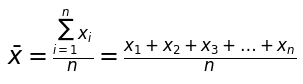

In [0]:
#@title Média aritmética - Equação

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$\bar x = \frac{\sum_{i=1}^n x_i}{n} = \frac{x_1 + x_2 + x_3 + \ldots + x_n}{n}$', fontdict={'fontsize':24})
plt.show()


**Média aritmética - Exemplo - Quantidade média de filhos vivos das mães viúvas**

In [0]:
#@title Dados

viuvas_filhosvivos.transpose()


,868,944,1283,3438,4385,4908,6597,8387,8983,10150,12417,12728,15422
QTDFILVIVO,5,6,2,2,0,3,0,2,4,9,1,6,5


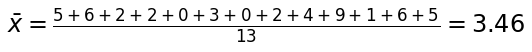

In [0]:
#@title Cálculo na média

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$\bar x = \frac{'+soma[:-1]+r'}{'+str(n)+r'} = '+str(media_fv)+r'$', fontdict={'fontsize':24})
plt.show()

### Moda

In [0]:
#@title Dados
viuvas_filhosvivos.transpose()

,868,944,1283,3438,4385,4908,6597,8387,8983,10150,12417,12728,15422
QTDFILVIVO,5,6,2,2,0,3,0,2,4,9,1,6,5


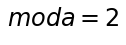

In [0]:
#@title Moda dos dados

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$moda = '+str(moda_fv)+r'$', fontdict={'fontsize':24})
plt.show()

### Mediana

**Quantidade ímpar de dados**

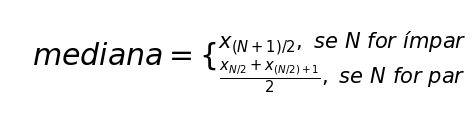

In [0]:
#@title Mediana - Equação
plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$mediana = \{\genfrac{}{}{0}{}{x_{(N+1)/2},\/\/se\/\/N\/\/for\/\/ímpar}{\frac{x_{N/2}+x_{(N/2)+1}}{2},\/\/se\/\/N\/\/for\/\/par}$'+'\n', 
          
          fontdict={'fontsize':30,'horizontalalignment':'left'})
plt.show()

In [0]:
#@title Quantidade de filhos vivos - dados ordenados
viuvas_filhosvivos_sort.transpose()

,4385,6597,12417,1283,3438,8387,4908,8983,868,15422,944,12728,10150
QTDFILVIVO,0,0,1,2,2,2,3,4,5,5,6,6,9


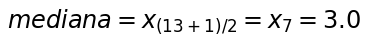

In [0]:
#@title Mediana da quantidade de filhos vivos

#viuvas_filhosvivos_sort['QTDFILVIVO'].values[(viuvas_filhosvivos.shape[0])//2]

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$mediana = x_{('+str(viuvas_filhosvivos_sort.shape[0])+' + 1)/2} = x_{7} ='+str(mediana_fv)+r'$', fontdict={'fontsize':24})
plt.show()

**Quantidade par de dados**

In [0]:
#@title Idade das mães viúvas - ordenado
viuvas_idade_sort.transpose()

,8387,4385,6597,14040,944,3438,8983,868,4908,1283,12417,12728,15422,10150
IDADEMAE,18.0,19.0,19.0,21.0,32.0,32.0,32.0,35.0,35.0,36.0,37.0,37.0,39.0,41.0


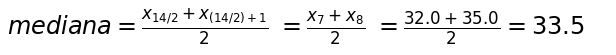

In [0]:
#@title Mediana da idade

p1 = viuvas_idade_sort['IDADEMAE'].values[viuvas_idade_sort.shape[0]//2-1]
p2 = viuvas_idade_sort['IDADEMAE'].values[viuvas_idade_sort.shape[0]//2]

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$mediana = \frac{x_{'+str(viuvas_idade_sort.shape[0])+'/2} + x_{('+str(viuvas_idade_sort.shape[0])+'/2) + 1}}{2} $'+' '
          +r'$ =\frac{x_{'+str(viuvas_idade_sort.shape[0]//2)+'} + x_{'+str(viuvas_idade_sort.shape[0]//2+1)+'}}{2}  $'+' '
          +r'$ =\frac{'+str(p1)+ '+' +str(p2)+'}{2}  ='+
          str(mediana_id)+r'$', fontdict={'fontsize':24, 'horizontalalignment':'right'})


plt.show()

### Quartil

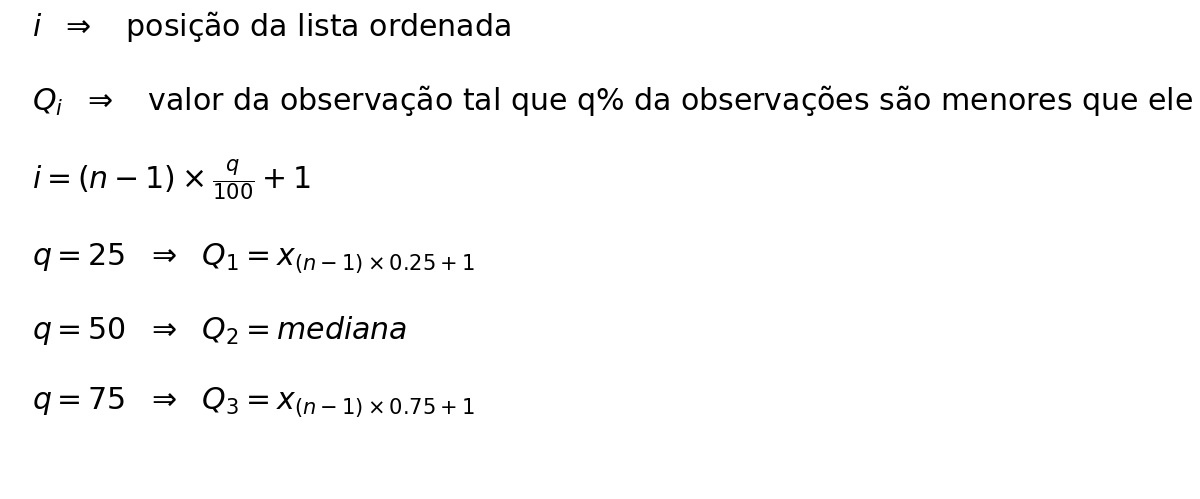

In [0]:
#@title Quartis - Equações
plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(
    r'$i \/\/\/\/ \Rightarrow \/\/\/\/ $'+' posição da lista ordenada'+'\n\n'+
    r'$Q_i \/\/\/\/ \Rightarrow \/\/\/\/$'+ ' valor da observação tal que q% das observações são menores que ele\n\n'
    r'$i = (n-1) \times \frac{q}{100} + 1$'+'\n\n'+
    r'$q=25 \/\/\/\/ \Rightarrow \/\/\/\/ Q_1 = x_{(n-1)\times 0.25 + 1}$'+'\n\n'+
          r'$q=50 \/\/\/\/ \Rightarrow \/\/\/\/ Q_2 = mediana $'+'\n\n'
          r'$q=75 \/\/\/\/ \Rightarrow \/\/\/\/ Q_3 = x_{(n-1)\times 0.75 + 1}$ '+'\n\n', 
          
          fontdict={'fontsize':30,'horizontalalignment':'left'})
plt.show()


In [0]:
#@title Quantidade de filhos vivos - dados ordenados
viuvas_filhosvivos.sort_values(by=['QTDFILVIVO']).transpose()

,4385,6597,12417,1283,3438,8387,4908,8983,868,15422,944,12728,10150
QTDFILVIVO,0,0,1,2,2,2,3,4,5,5,6,6,9


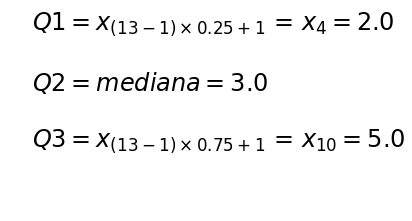

In [0]:
#@title Quartis

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$Q1 = x_{('+str(viuvas_filhosvivos_sort.shape[0])+r' - 1) \times 0.25 + 1 }$ = '+
          r'$x_{'+str(int(((viuvas_filhosvivos_sort.shape[0]-1)*0.25 + 1)))+'} ='+ str(q1_fv)+r'$'+'\n\n'+
          
          
          r'$Q2 = mediana =  '+str(q2_fv)+'$'+'\n\n'+
          r'$Q3 = x_{('+str(viuvas_filhosvivos_sort.shape[0])+r' - 1) \times 0.75 + 1 }$ = '+
          r'$x_{'+str(int(((viuvas_filhosvivos_sort.shape[0]-1)*0.75 + 1)))+'} ='+ str(q3_fv)+r'$'+'\n\n',
          fontdict={'fontsize':24,'horizontalalignment':'left'})
plt.show()

In [0]:
#@title Idade das mães viúvas - ordenado
viuvas_idade_sort.transpose()

,8387,4385,6597,14040,944,3438,8983,868,4908,1283,12417,12728,15422,10150
IDADEMAE,18.0,19.0,19.0,21.0,32.0,32.0,32.0,35.0,35.0,36.0,37.0,37.0,39.0,41.0


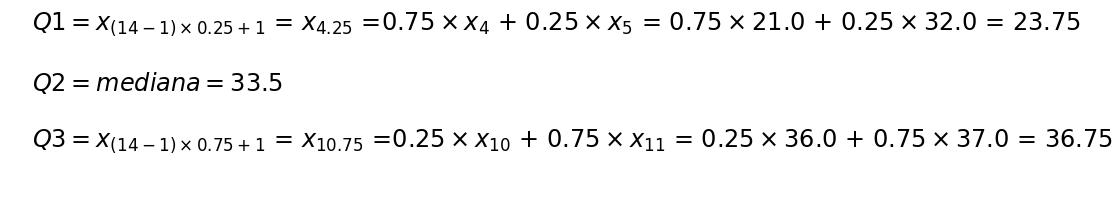

In [0]:
#@title Quartis

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$Q1 = x_{('+str(viuvas_idade_sort.shape[0])+r' - 1) \times 0.25 + 1 }$ = '+
          r'$x_{'+str(float(((viuvas_idade_sort.shape[0]-1)*0.25 + 1)))+'}$ ='+ 
          r'$0.75 \times x_{'+str(math.floor(((viuvas_idade_sort.shape[0]-1)*0.25 + 1)))+'}$ + '+ 
          r'$0.25 \times x_{'+str(math.ceil(((viuvas_idade_sort.shape[0]-1)*0.25 + 1)))+'}$ = '+ 
          r'$0.75 \times '+str(viuvas_idade_sort.iloc[3].values[0])+'$ + '+ 
          r'$0.25 \times '+str(viuvas_idade_sort.iloc[4].values[0])+'$ = '+ 
          
          str(q1_id)+'\n\n'+
          
          
          r'$Q2 = mediana =  '+str(mediana_id)+'$'+'\n\n'+
          r'$Q3 = x_{('+str(viuvas_idade_sort.shape[0])+r' - 1) \times 0.75 + 1 }$ = '+
          r'$x_{'+str(float(((viuvas_idade_sort.shape[0]-1)*0.75 + 1)))+'}$ ='+
          r'$0.25 \times x_{'+str(math.floor(((viuvas_idade_sort.shape[0]-1)*0.75 + 1)))+'}$ + '+ 
          r'$0.75 \times x_{'+str(math.ceil(((viuvas_idade_sort.shape[0]-1)*0.75 + 1)))+'}$ = '+ 
          r'$0.25 \times '+str(viuvas_idade_sort.iloc[9].values[0])+'$ + '+ 
          r'$0.75 \times '+str(viuvas_idade_sort.iloc[10].values[0])+'$ = '+ 
          
          str(q3_id)+'\n\n',
          fontdict={'fontsize':24,'horizontalalignment':'left'})
plt.show()

### Percentil

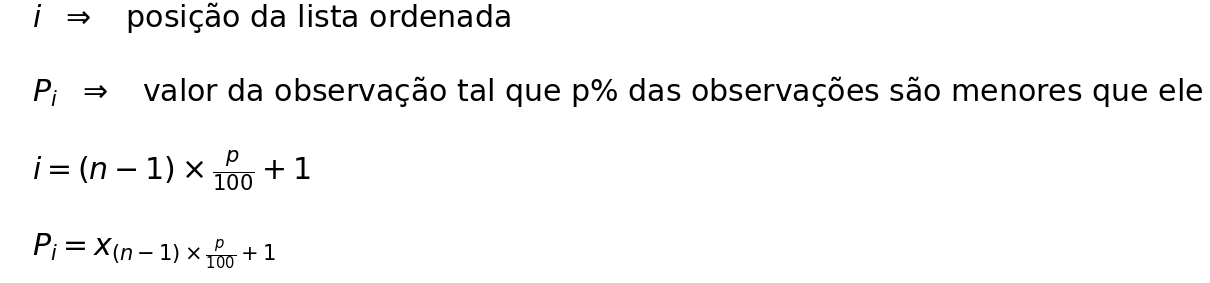

In [0]:
#@title Perceltil - Equação

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(
    
r'$i \/\/\/\/ \Rightarrow \/\/\/\/ $'+' posição da lista ordenada'+'\n\n'+
    r'$P_i \/\/\/\/ \Rightarrow \/\/\/\/$'+ ' valor da observação tal que p% das observações são menores que ele\n\n'+
    
    r'$i = (n-1) \times \frac{p}{100} + 1$'+'\n\n'+
    r'$P_i= x_{(n-1)\times \frac{p}{100} + 1}$', 
          
          fontdict={'fontsize':30,'horizontalalignment':'left'})

# plt.title(r'$P_p = X_{(N - 1) \times \frac{p}{100} + 1}$', 
          
#           fontdict={'fontsize':24,'horizontalalignment':'left'})
plt.show()

In [0]:
#@title Quantidade de filhos vivos - dados ordenados
viuvas_filhosvivos.sort_values(by=['QTDFILVIVO']).transpose()

,4385,6597,12417,1283,3438,8387,4908,8983,868,15422,944,12728,10150
QTDFILVIVO,0,0,1,2,2,2,3,4,5,5,6,6,9


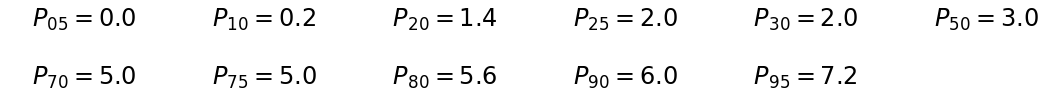

In [0]:
#@title Percentis

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$P_{05} = ' + str(p_5)+r'$'+'\t\t'+
          r'$P_{10} = '+ str(p_10)+r'$'+'\t\t'+
          r'$P_{20} = '+ str(p_20)+r'$'+'\t\t'+
          r'$P_{25} = '+ str(p_25)+r'$'+'\t\t'+
          r'$P_{30} = '+ str(p_30)+r'$'+'\t\t'+
          r'$P_{50} = '+ str(p_50)+r'$'+'\n\n'+
          r'$P_{70} = '+ str(p_70)+r'$'+'\t\t'+
          r'$P_{75} = '+ str(p_75)+r'$'+'\t\t'+
          r'$P_{80} = '+ str(p_80)+r'$'+'\t\t'+
          r'$P_{90} = '+ str(p_90)+r'$'+'\t\t'+
          r'$P_{95} = '+str(p_95)+r'$', 
          
          fontdict={'fontsize':24,'horizontalalignment':'left'})
plt.show()

In [0]:
#@title Exercício: calcule os percentis 20, 50 e 90 para as idades das mães viúvas
viuvas_idade_sort.transpose()

,8387,4385,6597,14040,944,3438,8983,868,4908,1283,12417,12728,15422,10150
IDADEMAE,18.0,19.0,19.0,21.0,32.0,32.0,32.0,35.0,35.0,36.0,37.0,37.0,39.0,41.0


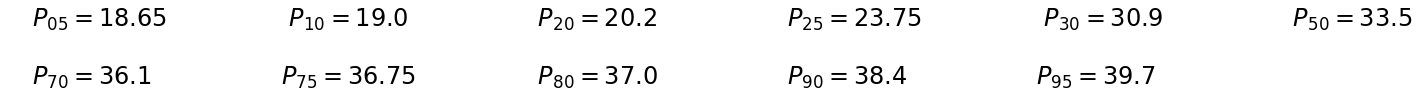

In [0]:
#@title Resposta

plt.axes((0, 0, 0.1, 0.01), facecolor='w')
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.title(r'$P_{05} = ' + str(p_id_5)+r'$'+'\t\t'+
          r'$P_{10} = '+ str(p_id_10)+r'$'+' \t\t'+
          r'$P_{20} = '+ str(p_id_20)+r'$'+' \t\t'+
          r'$P_{25} = '+ str(p_id_25)+r'$'+' \t\t'+
          r'$P_{30} = '+ str(p_id_30)+r'$'+' \t\t'+
          r'$P_{50} = '+ str(p_id_50)+r'$'+'\n\n'+
          r'$P_{70} = '+ str(p_id_70)+r'$'+' \t\t'+
          r'$P_{75} = '+ str(p_id_75)+r'$'+'\t\t'+
          r'$P_{80} = '+ str(p_id_80)+r'$'+' \t\t'+
          r'$P_{90} = '+ str(p_id_90)+r'$'+' \t\t'+
          r'$P_{95} = '+str(p_id_95)+r'$', 
          
          fontdict={'fontsize':24,'horizontalalignment':'left'})
plt.show()

# Medidas de Posição com Python


## Introdução ao Python



### Variáveis, atribuição e impressão na tela

```
# atribui o valor 10 à variável x
x = 10
# mostra o valor da variável
print(x)

```

In [0]:
#@Resultado
# atribui o valor 10 à variável x
x = 10
# mostra o valor da variável
print(x)

10



Utilizando o Google Colab, pode-se apenas colocar a variável que o resultado é mostrado
```
# atribui o valor 10 à variável x
x = 10
# mostra o valor da variável
x
```

In [0]:
#@Resultado
# atribui o valor 10 à variável x
x = 10
# mostra o valor da variável
print(x)

10


Repare que o código depois de # não aparece. Isso é chamado de comentário. O interpretador do python ignora os comentários



### Operadores Matemáticos



#### Soma

In [0]:
#@title Exemplo de soma
x = 5 + 3
y = x + 4
z = x + y
x, y, z

(8, 12, 20)

#### Subtração


In [0]:
#@title Exemplos de subtração
x = 5 - 3
y = x - 4
z = x - y
x, y, z

(2, -2, 4)

#### Multiplicação


In [0]:
#@title Exemplos de multiplicação
x = 5 * 3
y = x * 4
z = x * y
x, y, z

(15, 60, 900)

#### Divisão



In [0]:
#@title Exemplos de divisão
x = 5 / 3
y = x / 4
z = x / y
x, y, z

(1.6666666666666667, 0.4166666666666667, 4.0)

### Listas


In [0]:
#@title Exemplos de listas
# lista com idades
lista_inteiros = [22, 21, 18, 34, 28, 18, 22, 25, 25]

#lista com sexo
lista_strings = ['masculino','feminino','ignorado']

# lista com altura
lista_float = [1.70, 1.83, 1.57, 1.64]

# listas com listas

listas_compostas = [lista_inteiros, lista_strings, lista_float]

lista_inteiros,lista_strings, lista_float, listas_compostas

([22, 21, 18, 34, 28, 18, 22, 25, 25],
 ['masculino', 'feminino', 'ignorado'],
 [1.7, 1.83, 1.57, 1.64],
 [[22, 21, 18, 34, 28, 18, 22, 25, 25],
  ['masculino', 'feminino', 'ignorado'],
  [1.7, 1.83, 1.57, 1.64]])

## Biblioteca pandas

### Instalação

Bilioteca de python para a manipulação de dados

Ela já vem instalada no google colab

Para instalação em outros ambientes python, utilize no terminal:



```
pip install pandas
```

<br/>

A biblioteca trabalha com Dataframes, uma espécie de tabela para organizar os dados.

O primeiro passo para começar a utilizar o pandar é importá-la para o projeto


In [0]:
#@title Importar biblioteca pandas 
import pandas as pd

### Exemplo de dataframes

In [0]:
#@title Criar um dataframe com listas
lista_altura = [1.75, 1.73, 1.62, 1.69, 1.62, 1.90]

df = pd.DataFrame(lista_altura)
df

,0
0,1.75
1,1.73
2,1.62
3,1.69
4,1.62
5,1.90


In [0]:
#@title Dataframe com nome na coluna
lista_altura = [1.75, 1.73, 1.62, 1.69, 1.62, 1.90]

df = pd.DataFrame(lista_altura, columns=['Altura'])
df

,Altura
0,1.75
1,1.73
2,1.62
3,1.69
4,1.62
5,1.90


In [0]:
#@title Criar um dataframe com mais de uma coluna
lista_altura = [1.75, 1.73, 1.62, 1.69, 1.62, 1.90]
lista_sexo = ['m','f','f','m', 'f', 'm']

df = pd.DataFrame({'Altura': lista_altura, 'Sexo': lista_sexo})
df

,Altura,Sexo
0,1.75,m
1,1.73,f
2,1.62,f
3,1.69,m
4,1.62,f
5,1.90,m


In [0]:
#@title Descrever as características do dataframe
df.describe(include='all')

,Altura,Sexo
count,6.000000,6
unique,NaN,2
top,NaN,f
freq,NaN,3
mean,1.718333,NaN
std,0.104195,NaN
min,1.620000,NaN
25%,1.637500,NaN
50%,1.710000,NaN
75%,1.745000,NaN


In [0]:
#@title Medidas de posição da coluna altura

media = df['Altura'].mean()
mediana = df['Altura'].median()
moda = df['Altura'].mode()[0]
# quartis e percentis
# 0.25, 0.5 e 0.75 --> Quartis
# frações de 0.01 --> percentis
# 
percentis = df['Altura'].quantile([0.1, 0.3, 0.25, 0.5, 0.7, 0.75, 0.9])
lista_percentis = percentis.values

print('Média: ', media)
print('Mediana: ', mediana)
print('Moda: ', moda)

# todos os quantis
print('Quantis: ')
print(percentis)

# Q1: 0.25 --> índice 2 (3a posição) da lista de quantis
print('Q1: ', lista_percentis[2])
# Q2: 0.5 --> índice 3 (3a posição) da lista de quantis
print('Q2: ', lista_percentis[3])
# Q3: 0.75 --> índice 5 (6a posição) da lista de quantis
print('Q3: ', lista_percentis[5])
# P10: --> índice 0 (1a posição) da lista de quantis
print('P10: ', lista_percentis[0])
# P30: --> índice 1 (2a posição) da lista de quantis
print('P30: ', lista_percentis[1])
# P70 --> índice 4 (5a posição) da lista de quantis
print('P70: ', lista_percentis[4])
# P90 --> último elemento da lista de quantis
print('P90: ', lista_percentis[-1])


Média:  1.7183333333333335
Mediana:  1.71
Moda:  1.62
Quantis: 
0.10    1.6200
0.30    1.6550
0.25    1.6375
0.50    1.7100
0.70    1.7400
0.75    1.7450
0.90    1.8250
Name: Altura, dtype: float64
Q1:  1.6375000000000002
Q2:  1.71
Q3:  1.745
P10:  1.62
P30:  1.655
P70:  1.74
P90:  1.825


## Arquivos de Dados de Saúde - DATASUS

O DATASUS disponibiliza o download de dados de saúde de diversos sistemas:



*   SIHSUS - Sistema de Informações Hospitalares do SUS
*   SIASUS - Sistrma de Informações Ambulatoriais do SUS
*   SIM - Sistema de Informações de Mortalidade
*   CIH - Sistema de Comunicação e Informação Hospitalar
*   CIHA - Sistema de Comunicação de Informação Hospitalar e Ambulatorial
*   SINASC - Sistema de informação de Nascidos Vivos
*   SISPRENATAL - Sistema de Monitoramento e Avaliação do Pré-Natal, Parto, Puerpério e Criança
*   CNES - Cadastro Nacional de Estabelecimentos de Saúde
*   SINAN - Sistema de agravos de notificação compulsória

Download: [http://www2.datasus.gov.br/DATASUS/index.php?area=0901](http://www2.datasus.gov.br/DATASUS/index.php?area=0901)

Todos dos arquivos disponíveis: [ftp://ftp.datasus.gov.br/dissemin/publicos](ftp://ftp.datasus.gov.br/dissemin/publicos)



## Biblioteca PySUS
Bibloteca em Python para carrega para um dataframe dados em DBC e DBF, muito comum nos dados extraídos dos distemas do DATASUS

Projeto e documentação: [https://github.com/fccoelho/PySUS](https://github.com/fccoelho/PySUS) 

### Instalação

O PySUS não está no Google Colab. Ele pode ser instalado pelo pip com a seguinte linha de comando:

In [0]:
#@title Instalar biblioteca PySUS
!pip install PySUS

### Utilizando arquivos do Drive no Colab

Para exemplificar, vamos utilizar os dados do SINASC - nascidos vivos no Acre em 2017

Link para download: [ftp://ftp.datasus.gov.br/dissemin/publicos/SINASC/NOV/DNRES//DNAC2017.dbc](ftp://ftp.datasus.gov.br/dissemin/publicos/SINASC/NOV/DNRES//DNAC2017.dbc)
<br/><br/>

Faça o download do arquivo e coloque no seu Google Drive. O Google Colab consegue ler os aquivos diretamente do Google Drive

para pder utilizar os arquivos do Google Drive no Google Colab, é preciso montar o drive no Colab e dar permissão. Escreva os eguinte código:

In [0]:
#@title Montar Google Drive e dar permissão
from google.colab import drive
drive.mount('/content/drive')

Ao executar o comando, será solicitado clicar no link para dar a permissão e gerar om código de verificação. Copie o código de verificação e cole no campo que será exibido pelo comando anterior.
<br/><br/>

O drive será montado na seguinte pasta:


```
drive/My Drive
```

A partir dela, basta utilizar o nome das pastas e arquivos como está do seu Google Drive


### Carregar dados do SINASC
O PySUS lê os dados de um arquivo DBC ou DBF e coloca em um dataframe do pandas
A leitura do arquivo DBC é feita em 2 passos:


*   Importar a função read_dbc do PySUS
*   utilizar a função read_dbc, enviando como parâmetro o caminho do arquivo

Para vizualizar os dados importados, utilize a função head() do dataframe, que mostra os 4 primeiros registros




In [0]:
#@title Importad dados utilizando PySUS
# importar read_dbc
from pysus.utilities.readdbc import read_dbc

# caminho onde está o arquivo - troque pela sua pasta
caminho_arquivo = 'drive/My Drive/Colab Notebooks/analise_exploratoria/res/database/data/dbc/AC/DNAC2017.dbc'

# ler aqruivo DBC
# o parâmetro encoding serve para infromar qual a codificação de
# caracteres do arquivo
sinasc_ac2017 = read_dbc(caminho_arquivo, encoding='iso-8859-1')

# mostrar os 5 primeiros registros do dataframe
sinasc_ac2017.head()


,NUMERODN,CODINST,ORIGEM,NUMERODV,PREFIXODN,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,71276212,MRO1100100010,1,6,30,2515768,110010,1,22,1,4,,02,02,120040,6,1,2,2,17052017,1344,2,09,10,4,4085,2,25052017,,20170006,3.2.01,05062017,019,,812,120070,12,3,3,26081994,4,04,03,01,42,25072016,42,8,01,04,1,2,2,1,2,3,17052017,06,0,1,,05,1,2
1,71243444,MRO1100180002,1,7,30,2516047,110018,1,30,2,5,,01,,120020,5,1,2,3,27042017,1750,2,09,10,4,3460,2,04052017,,20170005,3.2.01,05052017,008,,811,110018,11,5,,11031987,4,01,,01,28,16072016,40,8,05,03,1,2,2,1,5,4,27042017,08,0,1,,05,1,3
2,71268591,MRO1100200003,1,1,30,5618347,110020,1,26,2,4,999992,03,00,120001,5,1,1,3,03012017,1830,2,08,09,4,3690,2,16012017,,20170002,3.2.01,03022017,031,,813,130240,13,3,3,05051990,4,03,03,00,,05042016,38,8,06,05,1,2,3,1,2,4,03012017,06,0,1,,03,1,2
3,71268099,MRO1100200003,1,5,30,5618347,110020,1,28,2,4,999992,00,00,120001,5,1,2,4,13022017,2025,2,08,09,4,2925,2,13032017,,20170004,3.2.01,06042017,052,,835,353440,35,2,8,08041988,4,00,00,00,22,15052016,38,8,07,02,1,1,2,1,2,4,18022017,04,0,1,,02,0,5
4,71262056,MRO1100200003,1,9,30,5618347,110020,1,22,2,3,622020,01,00,120040,5,1,1,3,10032017,0315,1,08,09,4,3720,2,23032017,,20170004,3.2.01,06042017,027,,812,120040,12,2,7,03091994,4,01,01,00,28,02062016,40,8,06,04,1,2,3,1,2,3,11032017,03,0,1,,03,1,2


Os dados são lidos todo no formato texto, ou seja, caracterizando todos como dados qualitativos.

É preciso transformar os dados quantitativos em números, para as que as análises ficarem corretas:


*   PESO
*   IDADEMAE
*   QTDFILVIVO
*   QTDFILMORT
*   APGAR 1
*   APGAR 5	




In [0]:
#@title Trabsformar tipo de dados dos dados quantitativos
import pandas as pd

# transforma dados do peso
sinasc_ac2017['PESO'] = pd.to_numeric(sinasc_ac2017['PESO'])
print('Peso:', sinasc_ac2017['PESO'].dtypes)

# transforma dados de apgar 5 min
sinasc_ac2017['APGAR5']= pd.to_numeric(sinasc_ac2017['APGAR5'])
print('APGAR 5 min:', sinasc_ac2017['APGAR5'].dtypes)

Peso: float64
APGAR 1 min: float64


### Nomes das colunas

In [0]:
#@title Nomes das colunas do dataframe
sinasc_ac2017.columns

Index(['NUMERODN', 'CODINST', 'ORIGEM', 'NUMERODV', 'PREFIXODN', 'CODESTAB',
       'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK'],
      dtype='object')

### Dimensões do dataframe

In [0]:
#@title Dimensões do dataframe - (linhas, colunas)
sinasc_ac2017.shape

(16358, 64)

### Selecionar mais de uma coluna

In [0]:
#@title Selecionar mais de uma coluna do dataframe
sinasc_ac2017[['NUMERODN','IDADEMAE','PARTO','CONSULTAS']].head()

,NUMERODN,IDADEMAE,PARTO,CONSULTAS
0,71276212,22,2,2
1,71243444,30,2,3
2,71268591,26,1,3
3,71268099,28,2,4
4,71262056,22,1,3


### Filtrar dados por valor de uma coluna
Exemplo: quais os registros de mães viúvas no Acre em 2017

In [0]:
#@title Mães viúvas no Acre em 2017
sinasc_ac2017[sinasc_ac2017['ESTCIVMAE'] == '3']

,NUMERODN,CODINST,ORIGEM,NUMERODV,PREFIXODN,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
868,71284915,MAC1200200001,1,9,30,2000296,120020,1,35,3,4,999992,05,01,120042,5,1,1,4,09032017,1725,1,09,10,4,4125,2,28022019,,20190004,3.2.01,28022019,721,,812,120020,12,3,3,27061981,4,06,05,00,,10062016,38,8,10,01,1,2,3,2,5,4,09032017,06,0,1,,03,1,5
944,71284704,MAC1200200001,1,0,30,2000296,120020,1,32,3,1,,06,00,120020,6,1,1,3,01032017,0300,2,09,10,,3435,2,03042017,,20170005,3.2.01,24052017,084,,812,120033,12,0,,08101984,,06,06,00,,25042016,44,8,05,05,1,2,3,2,5,4,01032017,00,0,1,,03,1,2
1283,71284426,MAC1200200001,1,2,30,2000296,120020,1,36,3,5,999992,02,00,120020,5,1,2,4,28042017,2234,1,08,09,4,2920,2,15052017,,20170007,3.2.01,01062017,034,,812,120020,12,4,,04091980,4,02,00,02,,,38,9,10,03,1,2,2,1,2,3,28042017,07,0,1,,05,1,5
2099,72670553,FAC1200309999,1,7,30,,120030,5,,3,2,,,,120030,5,9,9,1,01052017,,2,,,5,2000,2,27122017,,,,,240,,812,120030,12,1,2,,5,,,,,10082016,37,8,,,9,9,3,9,2,3,24072017,01,0,1,,11,0,9
3438,71290071,MAC1200400001,1,5,30,2000733,120040,1,32,3,4,,02,01,120040,5,1,2,3,03022017,2355,2,08,09,4,3555,2,16022017,,20170003,3.2.01,24022017,021,,812,120040,12,3,,26121984,4,01,,02,,28042016,39,8,04,06,2,2,1,1,2,4,04022017,12,0,1,,07,1,2
4385,71286129,MAC1200400001,1,9,30,2002078,120040,1,19,3,4,999992,00,00,120040,5,1,2,3,14032017,2220,1,08,09,,3275,2,31032017,,20170005,3.2.01,03042017,020,,812,120040,12,3,,24081997,,00,00,00,,09062016,39,8,05,04,1,2,2,1,2,3,15032017,12,0,1,,01,0,2
4908,71286413,MAC1200400001,1,1,30,2000733,120040,1,35,3,4,999992,03,00,120040,5,1,1,3,03042017,0205,2,08,09,1,2765,2,20042017,,20170007,3.2.01,24052017,051,,812,120030,12,3,,17121981,1,03,03,00,,15072016,37,8,05,09,9,2,3,2,2,4,03042017,12,0,1,,11,1,2
6597,71278521,MAC1200400001,1,5,30,2002078,120040,1,19,3,3,999992,00,00,120013,5,1,2,4,02062017,1204,2,07,08,4,3325,2,26062017,,20170011,3.2.01,30062017,028,,812,120030,12,2,,29071997,4,00,00,00,37,16082016,41,8,07,03,1,2,2,1,2,3,03062017,11,0,1,,01,0,5
8387,71278726,MAC1200100002,1,9,30,2001500,120010,1,18,3,4,999992,02,01,120025,5,1,1,3,16072017,0205,2,09,09,1,2950,2,27072017,,20170012,3.2.01,01082017,016,,812,120010,12,2,8,27031999,1,03,02,,,,40,9,06,99,1,2,3,1,2,0,16072017,04,0,1,,03,1,9
8983,71284273,MAC1200200001,1,1,30,2000296,120020,1,32,3,1,,04,00,120020,5,1,1,3,24072017,1150,1,08,09,4,3895,2,09082017,,20170012,3.2.01,21082017,028,,812,120020,12,0,,06071985,4,04,04,00,,08102016,41,8,06,06,1,2,3,2,2,3,24072017,00,0,1,,03,1,2


## Exercício - Medidas de posição

Faça o download dos dados dos nascidos vivos em 2017 de São Paulo e responsa às seguintes perguntas:



*   Qual a média para idade da mãe, peso, apgar 1 min, apgar 5 min, quantidade de filhos vivos e quantidade de filhos mortos?
*   Qual a idade tal que metade das idades das mães são menores que ela (mediana)?
*   Qual o apgar de 1 min que mais aparece (moda)?
*   Qual o apgar de 5 minutos que mais aparece?
*   Qual o peso do nascido tal que 10% dos pesos são menores que ele (P10)?
*   Qual o peso do nascido tal que 75% dos pesos são menores que ele (Q3)?
*   Qual a quantidade de filhos mortos que mais aparece?
*   Qual a média de idade de mães solteiras?
*   Qual a quantidade de filhos vivos das mães com até 3 anos de escolaridade tal que 25% dessa quantidade são menores que ela (Q1)?
*   Qual a moda da idade das mães para as crianças que nasceram com anomalia congênita?

<br/><br/>

Utilize como referência dos campos este arquivo: [https://drive.google.com/open?id=1N5exAY_Uk-uyCpzYFocIVn9MO3v-HqWrt](https://drive.google.com/open?id=1N5exAY_Uk-uyCpzYFocIVn9MO3v-HqWr)




### Resposta - Exercício - Medidas de posição

In [0]:
# caminho onde está o arquivo - troque pela sua pasta
caminho_arquivo = 'drive/My Drive/Colab Notebooks/analise_exploratoria/res/database/data/dbc/SP/DNSP2017.dbc'

# ler aqruivo DBC dos nascidos vivos em 2017 em SP
sinasc_sp2017 = read_dbc(caminho_arquivo, encoding='iso-8859-1')

In [0]:

# transforma dados do peso
sinasc_sp2017['PESO'] = pd.to_numeric(sinasc_sp2017['PESO'])
print('Peso:', sinasc_sp2017['PESO'].dtypes)

# transforma dados de apgar 5 min
sinasc_sp2017['IDADEMAE']= pd.to_numeric(sinasc_sp2017['IDADEMAE'])
print('Idade Mae:', sinasc_sp2017['IDADEMAE'].dtypes)


# transforma dados de apgar 5 min
sinasc_sp2017['QTDFILVIVO']= pd.to_numeric(sinasc_sp2017['QTDFILVIVO'])
print('Qtd Filhos vivos:', sinasc_sp2017['QTDFILVIVO'].dtypes)


# transforma dados de apgar 5 min
sinasc_sp2017['QTDFILMORT']= pd.to_numeric(sinasc_sp2017['QTDFILMORT'])
print('Qtd Filhos mortos:', sinasc_sp2017['QTDFILMORT'].dtypes)


# transforma dados de apgar 5 min
sinasc_sp2017['APGAR1']= pd.to_numeric(sinasc_sp2017['APGAR1'])
print('APGAR 1 min:', sinasc_sp2017['APGAR1'].dtypes)

# transforma dados de apgar 5 min
sinasc_sp2017['APGAR5']= pd.to_numeric(sinasc_sp2017['APGAR5'])
print('APGAR 5 min:', sinasc_sp2017['APGAR5'].dtypes)

Peso: float64
Idade Mae: int64
Qtd Filhos vivos: float64
Qtd Filhos mortos: float64
APGAR 1 min: float64
APGAR 5 min: float64


In [0]:
# filtro para as mães com até 3 anos de escolaridade
escolaridade = sinasc_sp2017[(sinasc_sp2017['ESCMAE'] == '1') | (sinasc_sp2017['ESCMAE'] == '2')]
#filtro para as mães solteiras
solteiras = sinasc_sp2017[sinasc_sp2017['ESTCIVMAE'] == '1']
# filtro para os nascimentos com anomalia
anomalia = sinasc_sp2017[sinasc_sp2017['IDANOMAL'] == '1']

In [0]:
# descrição do dataframe
sinasc_sp2017.describe()

,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5,PESO
count,611803.000000,607568.000000,602216.000000,610115.000000,610253.000000,611784.000000
mean,27.767283,0.908563,0.238209,8.508984,9.538390,3162.315960
std,6.641808,1.217092,0.719032,2.871752,2.580067,558.149447
min,11.000000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,22.000000,0.000000,0.000000,8.000000,9.000000,2885.000000
50%,28.000000,1.000000,0.000000,9.000000,10.000000,3200.000000
75%,33.000000,1.000000,0.000000,9.000000,10.000000,3505.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,6570.000000


In [0]:
# calcular as médias das colunas
medias = sinasc_sp2017[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mean()
medias

PESO          3162.315960
IDADEMAE      27.767283  
QTDFILVIVO    0.908563   
QTDFILMORT    0.238209   
APGAR1        8.508984   
APGAR5        9.538390   
dtype: float64

In [0]:
# calcular as medianas das colunas
medianas = sinasc_sp2017[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].median()
medianas

PESO          3200.0
IDADEMAE      28.0  
QTDFILVIVO    1.0   
QTDFILMORT    0.0   
APGAR1        9.0   
APGAR5        10.0  
dtype: float64

In [0]:
# calcular a moda das colunas
modas = sinasc_sp2017[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mode()
modas

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0,3200.0,29,0.0,0.0,9.0,10.0


In [0]:
# calcular a quantis das colunas
quantis = sinasc_sp2017[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].quantile([0.1, 0.25, 0.5, 0.75])
quantis

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0.10,2530.0,19.0,0.0,0.0,7.0,9.0
0.25,2885.0,22.0,0.0,0.0,8.0,9.0
0.50,3200.0,28.0,1.0,0.0,9.0,10.0
0.75,3505.0,33.0,1.0,0.0,9.0,10.0


In [0]:
# escolaridade - média
escolaridade[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mean()

PESO          3121.643459
IDADEMAE      31.987140  
QTDFILVIVO    2.636140   
QTDFILMORT    0.408607   
APGAR1        8.589881   
APGAR5        9.664431   
dtype: float64

In [0]:
# mães solteiras - média
solteiras[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mean()

PESO          3137.823735
IDADEMAE      25.354092  
QTDFILVIVO    0.885959   
QTDFILMORT    0.206295   
APGAR1        8.488696   
APGAR5        9.532305   
dtype: float64

In [0]:
# anomalia - média
anomalia[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mean()

PESO          2910.047417
IDADEMAE      28.794121  
QTDFILVIVO    0.885250   
QTDFILMORT    0.274188   
APGAR1        7.835053   
APGAR5        9.062743   
dtype: float64

In [0]:
# escolaridade - mediana
escolaridade[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].median()

PESO          3160.0
IDADEMAE      34.0  
QTDFILVIVO    2.0   
QTDFILMORT    0.0   
APGAR1        9.0   
APGAR5        10.0  
dtype: float64

In [0]:
# mães solteiras - mediana
solteiras[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].median()

PESO          3180.0
IDADEMAE      24.0  
QTDFILVIVO    1.0   
QTDFILMORT    0.0   
APGAR1        9.0   
APGAR5        10.0  
dtype: float64

In [0]:
# anomalia - mediana
anomalia[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].median()

PESO          3030.0
IDADEMAE      29.0  
QTDFILVIVO    1.0   
QTDFILMORT    0.0   
APGAR1        8.0   
APGAR5        9.0   
dtype: float64

In [0]:
# escolaridade - moda
escolaridade[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mode()

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0,3200.0,36,2.0,0.0,9.0,10.0


In [0]:
# mães solteiras - moda
solteiras[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mode()

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0,3200.0,20,0.0,0.0,9.0,10.0


In [0]:
# anomalia - moda
anomalia[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].mode()

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0,3100.0,34,0.0,0.0,9.0,10.0


In [0]:
# escolaridade - quantis
escolaridade[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].quantile([0.1, 0.25, 0.5, 0.75])

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0.10,2405.00,21.0,0.0,0.0,7.0,9.0
0.25,2796.25,27.0,1.0,0.0,8.0,9.0
0.50,3160.00,34.0,2.0,0.0,9.0,10.0
0.75,3500.00,38.0,4.0,1.0,9.0,10.0


In [0]:
# mães solteiras - quantis
solteiras[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].quantile([0.1, 0.25, 0.5, 0.75])

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0.10,2500.0,17.0,0.0,0.0,7.0,9.0
0.25,2860.0,20.0,0.0,0.0,8.0,9.0
0.50,3180.0,24.0,1.0,0.0,9.0,10.0
0.75,3485.0,30.0,1.0,0.0,9.0,10.0


In [0]:
# anomalia - quantis
anomalia[['PESO','IDADEMAE','QTDFILVIVO','QTDFILMORT','APGAR1','APGAR5']].quantile([0.1, 0.25, 0.5, 0.75])

,PESO,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5
0.10,1855.0,19.0,0.0,0.0,4.0,8.0
0.25,2540.0,23.0,0.0,0.0,7.0,9.0
0.50,3030.0,29.0,1.0,0.0,8.0,9.0
0.75,3395.0,34.0,1.0,0.0,9.0,10.0


# Medidas de Dispersão

Quão espalhados estão os dados

## Desvio Médio

In [29]:
#@title Dados

consultas1_apgar.mad(), consultas4_apgar.mad()

(APGAR1    0.545146
 dtype: float64, APGAR1    0.66319
 dtype: float64)

In [0]:
sinasc_ac2017['PESO'] = pd.to_numeric(sinasc_ac2017['PESO'])
sinasc_ac2017['IDADEMAE']= pd.to_numeric(sinasc_ac2017['IDADEMAE'])
sinasc_ac2017['QTDFILVIVO']= pd.to_numeric(sinasc_ac2017['QTDFILVIVO'])
sinasc_ac2017['QTDFILMORT']= pd.to_numeric(sinasc_ac2017['QTDFILMORT'])
sinasc_ac2017['APGAR1']= pd.to_numeric(sinasc_ac2017['APGAR1'])
sinasc_ac2017['APGAR5']= pd.to_numeric(sinasc_ac2017['APGAR5'])



In [38]:
sinasc_ac2017[(sinasc_ac2017['CONSULTAS'] == '1')].mad()

IDADEMAE      6.673469  
QTDFILVIVO    2.189349  
QTDFILMORT    0.473373  
APGAR1        0.448980  
APGAR5        0.510204  
PESO          485.982222
dtype: float64

In [46]:
sinasc_ac2017[(sinasc_ac2017['CONSULTAS'] == '2')].mad()

IDADEMAE      6.036298  
QTDFILVIVO    1.861298  
QTDFILMORT    0.503438  
APGAR1        0.805678  
APGAR5        0.670641  
PESO          451.654062
dtype: float64

In [47]:
sinasc_ac2017[(sinasc_ac2017['CONSULTAS'] == '3')].mad()

IDADEMAE      5.914663  
QTDFILVIVO    1.491617  
QTDFILMORT    0.515984  
APGAR1        0.709441  
APGAR5        0.529500  
PESO          428.789700
dtype: float64

In [45]:
sinasc_ac2017[(sinasc_ac2017['CONSULTAS'] == '4')].describe()

,IDADEMAE,QTDFILVIVO,QTDFILMORT,APGAR1,APGAR5,PESO
count,7616.000000,6482.000000,5298.000000,7425.000000,7423.000000,7614.000000
mean,25.797925,1.584388,0.338052,8.302896,9.204365,3329.403467
std,6.563794,1.590957,0.634653,0.927009,0.638411,476.640621
min,12.000000,0.000000,0.000000,1.000000,0.000000,280.000000
25%,20.000000,0.000000,0.000000,8.000000,9.000000,3040.000000
50%,25.000000,1.000000,0.000000,8.000000,9.000000,3335.000000
75%,31.000000,2.000000,1.000000,9.000000,10.000000,3630.000000
max,47.000000,14.000000,6.000000,10.000000,10.000000,5700.000000


## Variância

## Desvio Padrão

## Amplitude Interquartil

## Coeficiente de Variação

# Variáveis Quantitativas e Medidas Descritivas

## Medidas de Posição

### Média Aritmética

### Moda

### Mediana

### Quartil

### Percentil

## Medidas de Dispersão

### Desvio Médio

### Variância

### Desvio Padrão

## Amplitude Interquartil

### Coeficiente de Variação



# Variáveis Quantitativas e Representações

# Variáveis Qualitativas e Representações

# Variáveis Qualitativas - Tabela de Contingência e Medidas de Associação

# Associação entre Variáveis Qualitativas e Quantitativas

# Análise de Agrupamentos